In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully for ADC map analysis")

Libraries loaded successfully for ADC map analysis


In [2]:
# Patient specifications - Focus on WHO Grade 2 vs 4 comparison only
patient_specs = [
    # WHO Grade 4 patients (5 patients)
    {"id": "Patient08", "who_grade": 4, 
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_ROIs_to_DWI_small.nii',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_b1000_ADC.nii.gz'},
    {"id": "Patient12", "who_grade": 4,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_b1000_ADC.nii.gz'},
    {"id": "Patient03", "who_grade": 4, 
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient03\Patient03_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient03\Patient03_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient03\Patient03_b1000_ADC.nii.gz'},
    {"id":"Patient13", "who_grade": 4,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient13\Patient13_ROIs_to_DWI_small.nii',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient13\Patient13_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient13\Patient13_b1000_ADC.nii.gz'},
    {"id":"Patient17", "who_grade": 4,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient17\Patient17_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient17\Patient17_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient17\Patient17_b1000_ADC.nii.gz'},

    # WHO Grade 2 patients (4 patients)
    {"id": "Patient09", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient09\Patient09_ROIs_to_DWI_small.nii',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient09\Patient09_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient09\Patient09_b1000_ADC.nii.gz'},
    {"id": "Patient06", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient06\Patient06_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient06\Patient06_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient06\Patient06_b1000_ADC.nii.gz'},
    {"id": "Patient19", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient19\Patient19_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient19\Patient19_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient19\Patient19_b1000_ADC.nii.gz'},
    {"id": "Patient21", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient21\Patient21_ROIs_to_DWI_small.nii',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient21\Patient21_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient21\Patient21_b1000_ADC.nii.gz'},
]

print(f"Total patients: {len(patient_specs)}")
print(f"WHO Grade 2 patients: {len([p for p in patient_specs if p['who_grade'] == 2])}")
print(f"WHO Grade 4 patients: {len([p for p in patient_specs if p['who_grade'] == 4])}")
print("Patients by ID:", [p['id'] for p in patient_specs])

Total patients: 9
WHO Grade 2 patients: 4
WHO Grade 4 patients: 5
Patients by ID: ['Patient08', 'Patient12', 'Patient03', 'Patient13', 'Patient17', 'Patient09', 'Patient06', 'Patient19', 'Patient21']


# ADC Map Group Analysis: WHO Grade 2 vs 4 Comparison

This notebook analyzes ADC (Apparent Diffusion Coefficient) maps from brain tumor patients, comparing WHO Grade 2 vs Grade 4 tumors by directly extracting ADC values from tumor regions (ROI 1).

**Key Features:**
- Direct analysis of ADC map values (no DL model inference needed)
- Compares only WHO Grade 2 vs Grade 4 patients
- Extracts ADC values from tumor core regions (ROI 1)
- Provides comprehensive statistical analysis and visualization of ADC differences between tumor grades

In [3]:
# ADC DATA LOADING AND PROCESSING UTILITIES

def extract_roi1_tumor_core(roi_data):
    """
    Extract ROI 1 (tumor core) from ROI data.
    Handles multi-channel, integer-labeled, or binary formats.
    """
    if roi_data.ndim == 4:  # Multi-channel
        roi1_mask = roi_data[:, :, :, 0] > 0  # Use channel 0 as ROI 1
        print("  Multi-channel ROI detected, using channel 0 as ROI 1")
    elif roi_data.ndim == 3:  # Single volume
        unique_vals = np.unique(roi_data)
        print(f"  ROI unique values: {unique_vals}")
        if len(unique_vals) == 2 and 0 in unique_vals and 1 in unique_vals:
            # Binary ROI
            roi1_mask = roi_data == 1
            print("  Binary ROI detected, using label==1 as ROI 1")
        elif len(unique_vals) > 2:
            # Integer-labeled ROI
            roi1_mask = roi_data == 1
            print("  Integer-labeled ROI detected, using label==1 as ROI 1")
        else:
            # Fallback: use any non-zero as ROI 1
            roi1_mask = roi_data > 0
            print("  Using any non-zero values as ROI 1")
    else:
        raise ValueError(f"Unexpected ROI data dimensions: {roi_data.shape}")
    
    return roi1_mask

def load_patient_adc_data(patient_spec):
    """Load ADC map and extract ROI 1 tumor core ADC values for a patient"""
    patient_id = patient_spec["id"]
    roi_path = patient_spec["roi_path"]
    adc_path = patient_spec["adc_map_path"]
    
    print(f"\nLoading {patient_id} (WHO Grade {patient_spec['who_grade']})...")
    print(f"  ROI path: {roi_path}")
    print(f"  ADC path: {adc_path}")
    
    # Verify files exist
    for path, name in [(roi_path, "ROI"), (adc_path, "ADC")]:
        if not os.path.exists(path):
            raise FileNotFoundError(f"{name} file not found: {path}")
    
    # Load ADC map data
    adc_img = nib.load(adc_path)
    adc_data = adc_img.get_fdata()
    print(f"  ADC data shape: {adc_data.shape}")
    
    # Load ROI data
    roi_img = nib.load(roi_path)
    roi_data = roi_img.get_fdata()
    print(f"  ROI data shape: {roi_data.shape}")
    
    # Extract ROI 1 (tumor core)
    roi1_mask = extract_roi1_tumor_core(roi_data)
    
    # Extract ADC values from tumor core
    if np.any(roi1_mask):
        # ADC values for analysis (shape: n_voxels)
        tumor_adc_values = adc_data[roi1_mask]
        
        print(f"  Tumor core voxels: {len(tumor_adc_values)}")
        print(f"  ADC value range: [{tumor_adc_values.min():.6f}, {tumor_adc_values.max():.6f}] mm²/s")
        
        return {
            "patient_id": patient_id,
            "who_grade": patient_spec["who_grade"],
            "tumor_adc_values": tumor_adc_values,
            "n_voxels": len(tumor_adc_values)
        }
    else:
        print(f"  WARNING: No tumor core found for {patient_id}")
        return None

print("ADC data loading functions ready.")

ADC data loading functions ready.


In [4]:
# LOAD ALL PATIENT DATA AND EXTRACT ADC VALUES
print("=" * 80)
print("LOADING PATIENT DATA AND EXTRACTING ADC VALUES FROM TUMOR CORES")
print("=" * 80)

# Load all patient data (skip missing patients)
patient_data = {}
for patient_spec in patient_specs:
    try:
        data = load_patient_adc_data(patient_spec)
        if data is not None:
            patient_data[data["patient_id"]] = data
    except FileNotFoundError as e:
        print(f"  WARNING: Skipping {patient_spec['id']} - file not found: {e}")
        continue

print(f"\nSuccessfully loaded {len(patient_data)} patients")
print(f"Patients: {list(patient_data.keys())}")

# Summary of loaded data
print("\nPatient Summary:")
grade_counts = {2: 0, 4: 0}
total_voxels_by_grade = {2: 0, 4: 0}

for patient_id, data in patient_data.items():
    grade = data['who_grade']
    n_voxels = data['n_voxels']
    grade_counts[grade] += 1
    total_voxels_by_grade[grade] += n_voxels
    print(f"  {patient_id}: WHO Grade {grade}, "
          f"{n_voxels} tumor core voxels, "
          f"ADC range: [{data['tumor_adc_values'].min():.6f}, {data['tumor_adc_values'].max():.6f}] mm²/s")

print(f"\nGrade distribution:")
print(f"  Grade 2: {grade_counts[2]} patients, {total_voxels_by_grade[2]} total voxels")
print(f"  Grade 4: {grade_counts[4]} patients, {total_voxels_by_grade[4]} total voxels")

LOADING PATIENT DATA AND EXTRACTING ADC VALUES FROM TUMOR CORES

Loading Patient08 (WHO Grade 4)...
  ROI path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_ROIs_to_DWI_small.nii
  ADC path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient08\Patient08_b1000_ADC.nii.gz
  ADC data shape: (112, 112, 60)
  ROI data shape: (112, 112, 60)
  ROI unique values: [0. 1. 2.]
  Integer-labeled ROI detected, using label==1 as ROI 1
  Tumor core voxels: 104
  ADC value range: [0.000887, 0.002026] mm²/s

Loading Patient12 (WHO Grade 4)...
  ROI path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_ROIs_to_DWI_small.nii.gz
  ADC path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient12\Patient12_b1000_ADC.nii.gz
  ADC data shape: (112, 112, 60)
  ROI data shape: (112, 112, 60)
  ROI unique values: [0. 1. 2.]
  Integer-labeled ROI detected, using label==1 as ROI 1
  Tumor core voxels: 1230
  ADC value range: [0.000606, 0.001954] mm²/s

Loading

In [5]:
# BUILD TIDY DATAFRAME FOR ADC VALUES ANALYSIS
print("=" * 80)
print("BUILDING TIDY DATAFRAME FOR ADC VALUES")
print("=" * 80)

# Create tidy dataframe for ADC values
adc_data = []

for patient_id, data in patient_data.items():
    who_grade = data['who_grade']
    adc_values = data['tumor_adc_values']
    
    # Add each ADC value as a separate row
    for adc_value in adc_values:
        adc_data.append({
            'patient_id': patient_id,
            'who_grade': who_grade,
            'adc_value': adc_value
        })

# Convert to DataFrame
df_adc = pd.DataFrame(adc_data)

print(f"ADC dataframe created with {len(df_adc)} rows")
print(f"Unique patients: {df_adc['patient_id'].nunique()}")
print(f"WHO grades: {sorted(df_adc['who_grade'].unique())}")

# Display summary statistics
print("\nADC Summary by WHO Grade:")
adc_summary = df_adc.groupby('who_grade')['adc_value'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(6)
print(adc_summary)

# Statistical test between grades
print("\nStatistical Comparison (Mann-Whitney U Test):")
grade2_adc = df_adc[df_adc['who_grade'] == 2]['adc_value']
grade4_adc = df_adc[df_adc['who_grade'] == 4]['adc_value']

if len(grade2_adc) > 0 and len(grade4_adc) > 0:
    statistic, p_value = stats.mannwhitneyu(grade2_adc, grade4_adc, alternative='two-sided')
    print(f"  Mann-Whitney U statistic: {statistic}")
    print(f"  p-value: {p_value:.2e}")
    print(f"  Significance: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
    
    # Effect size (Cliff's delta)
    def cliffs_delta(x, y):
        """Calculate Cliff's delta effect size"""
        n1, n2 = len(x), len(y)
        delta = 0
        for i in x:
            for j in y:
                if i > j:
                    delta += 1
                elif i < j:
                    delta -= 1
        return delta / (n1 * n2)
    
    delta = cliffs_delta(grade2_adc, grade4_adc)
    print(f"  Cliff's delta (effect size): {delta:.3f}")
    
    if abs(delta) >= 0.474:
        effect_size = "large"
    elif abs(delta) >= 0.33:
        effect_size = "medium"
    elif abs(delta) >= 0.147:
        effect_size = "small"
    else:
        effect_size = "negligible"
    print(f"  Effect size interpretation: {effect_size}")
else:
    print("  Cannot perform statistical test - insufficient data")

BUILDING TIDY DATAFRAME FOR ADC VALUES
ADC dataframe created with 10826 rows
Unique patients: 9
WHO grades: [np.int64(2), np.int64(4)]

ADC Summary by WHO Grade:
           count      mean       std       min       max
who_grade                                               
2           3808  0.001448  0.000200  0.000756  0.002612
4           7018  0.001303  0.000494  0.000349  0.002795

Statistical Comparison (Mann-Whitney U Test):
  Mann-Whitney U statistic: 17091080.0
  p-value: 2.02e-127
  Significance: ***
  Cliff's delta (effect size): 0.279
  Effect size interpretation: small


ADC VALUES COMPARISON: WHO GRADE 2 vs 4


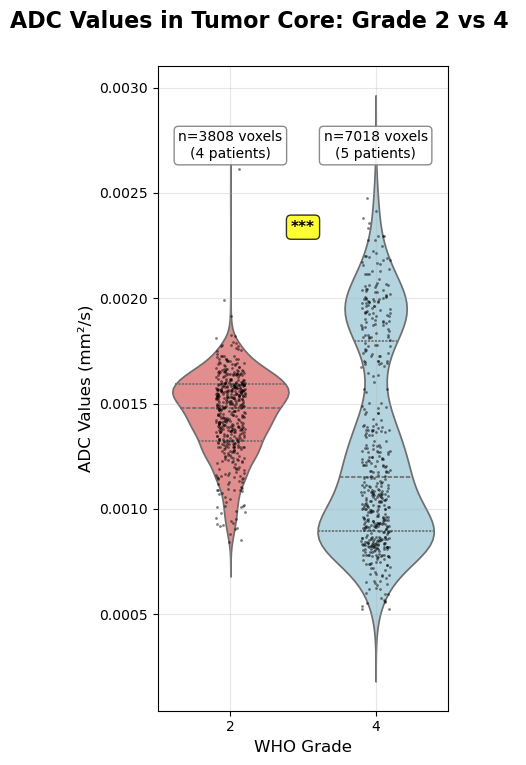


ADC values comparison completed!
Visualization shows ADC values from 10826 tumor core voxels
across 9 patients (4 Grade 2, 5 Grade 4)

Per-patient ADC Summary:
                      count      mean       std       min       max
patient_id who_grade                                               
Patient03  4           1560  0.000955  0.000308  0.000349  0.002519
Patient06  2             22  0.000878  0.000046  0.000756  0.000949
Patient08  4            104  0.001252  0.000207  0.000887  0.002026
Patient09  2           2076  0.001417  0.000186  0.000880  0.002612
Patient12  4           1230  0.001185  0.000235  0.000606  0.001954
Patient13  4           2164  0.001011  0.000245  0.000502  0.002795
Patient17  4           1960  0.001981  0.000185  0.001410  0.002759
Patient19  2           1654  0.001512  0.000176  0.000817  0.001868
Patient21  2             56  0.000953  0.000058  0.000826  0.001087


In [ ]:
# ADC VALUES COMPARISON: WHO GRADE 2 vs 4
print("=" * 80)
print("ADC VALUES COMPARISON: WHO GRADE 2 vs 4")
print("=" * 80)

# Create single boxplot visualization
fig, ax = plt.subplots(1, 1, figsize=(4, 8))
fig.suptitle('ADC Values in Tumor Core: Grade 2 vs 4 ', 
             fontsize=16, fontweight='bold', y=0.95)

# Boxplot with individual points
sns.boxplot(data=df_adc, x='who_grade', y='adc_value', hue='who_grade', ax=ax, 
            palette=['lightcoral', 'lightblue'], legend=False)

# Add jittered points (subsample for clarity if too many)
df_adc_sub = df_adc.groupby('who_grade').apply(
    lambda x: x.sample(min(500, len(x)), random_state=42),
    include_groups=False
).reset_index()
if 'level_1' in df_adc_sub.columns:
    df_adc_sub = df_adc_sub.drop(columns=['level_1'])

sns.stripplot(data=df_adc_sub, x='who_grade', y='adc_value', ax=ax, 
              size=2, alpha=0.5, color='black')

# Remove the overlapping subplot title
ax.set_xlabel('WHO Grade', fontsize=12)
ax.set_ylabel('ADC Values (mm²/s)', fontsize=12)
ax.grid(True, alpha=0.3)

# Add sample sizes positioned within the plot area
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min

# Get the unique grades and their corresponding positions
unique_grades = sorted(df_adc['who_grade'].unique())
for i, grade in enumerate(unique_grades):
    grade_data = df_adc[df_adc['who_grade'] == grade]
    if not grade_data.empty:
        n_patients = grade_data['patient_id'].nunique()
        n_voxels = len(grade_data)
        # Position the text box in the upper portion of the plot, but well within bounds
        y_pos = y_max - 0.1 * y_range  # 10% down from the top
        # Use the index i for x-position (0 for first grade, 1 for second grade, etc.)
        ax.text(i, y_pos, 
                f'n={n_voxels} voxels\n({n_patients} patients)',
                ha='center', va='top', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'))

# Add statistical annotation positioned in the middle-upper area
if len(grade2_adc) > 0 and len(grade4_adc) > 0:
    _, p_value = stats.mannwhitneyu(grade2_adc, grade4_adc, alternative='two-sided')
    if p_value < 0.001:
        sig_text = "***"
    elif p_value < 0.01:
        sig_text = "**"
    elif p_value < 0.05:
        sig_text = "*"
    else:
        sig_text = "ns"
    
    # Position statistical annotation in the middle of the plot
    y_pos = y_max - 0.25 * y_range  # 25% down from the top
    ax.text(0.5, y_pos, f'{sig_text}', 
            ha='center', va='center',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Leave space for the main title
plt.show()

print("\nADC values comparison completed!")
print(f"Visualization shows ADC values from {len(df_adc)} tumor core voxels")
print(f"across {df_adc['patient_id'].nunique()} patients ({grade_counts[2]} Grade 2, {grade_counts[4]} Grade 4)")

# Summary table by patient
print("\nPer-patient ADC Summary:")
patient_stats = df_adc.groupby(['patient_id', 'who_grade'])['adc_value'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(6)
print(patient_stats)

In [7]:
patient_spec2 = [
    # WHO Grade 3 patients (5 patients)
    {"id": "Patient01", "who_grade": 3,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient01\Patient01_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient01\Patient01_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient01\Patient01_b1000_ADC.nii.gz'},
    {"id": "Patient02", "who_grade": 3,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient02\Patient02_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient02\Patient02_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient02\Patient02_b1000_ADC.nii.gz'},
    {"id": "Patient05", "who_grade": 3,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient05\Patient05_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient05\Patient05_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient05\Patient05_b1000_ADC.nii.gz'},
    {"id": "Patient16", "who_grade": 3,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient16\Patient16_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient16\Patient16_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient16\Patient16_b1000_ADC.nii.gz'},
    {"id": "Patient18", "who_grade": 3,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient18\Patient18_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient18\Patient18_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient18\Patient18_b1000_ADC.nii.gz'},

    # WHO Grade 2 patients (4 patients)
    {"id": "Patient09", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient09\Patient09_ROIs_to_DWI_small.nii',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient09\Patient09_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient09\Patient09_b1000_ADC.nii.gz'},
    {"id": "Patient06", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient06\Patient06_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient06\Patient06_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient06\Patient06_b1000_ADC.nii.gz'},
    {"id": "Patient19", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient19\Patient19_ROIs_to_DWI_small.nii.gz',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient19\Patient19_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient19\Patient19_b1000_ADC.nii.gz'},
    {"id": "Patient21", "who_grade": 2,
     "roi_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient21\Patient21_ROIs_to_DWI_small.nii',
     "brain_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient21\Patient21_mc_normb0.nii.gz',
     "adc_map_path": r'D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient21\Patient21_b1000_ADC.nii.gz'},
]

# ADC Map Group Analysis: WHO Grade 2 vs 3 Comparison

Now we'll perform a similar analysis comparing WHO Grade 2 vs Grade 3 tumors using the new patient specification (`patient_spec2`) that includes Grade 3 patients.

**Analysis Overview:**
- Direct analysis of ADC map values from tumor core regions (ROI 1)
- Compares WHO Grade 2 vs Grade 3 patients
- Statistical comparison and visualization of ADC differences between these tumor grades

In [8]:
# LOAD PATIENT DATA FOR GRADE 2 vs 3 ANALYSIS
print("=" * 80)
print("LOADING PATIENT DATA FOR WHO GRADE 2 vs 3 ANALYSIS")
print("=" * 80)

print(f"Total patients in patient_spec2: {len(patient_spec2)}")
print(f"WHO Grade 2 patients: {len([p for p in patient_spec2 if p['who_grade'] == 2])}")
print(f"WHO Grade 3 patients: {len([p for p in patient_spec2 if p['who_grade'] == 3])}")
print("Patients by ID:", [p['id'] for p in patient_spec2])

# Load all patient data from patient_spec2 (skip missing patients)
patient_data_23 = {}
for patient_spec in patient_spec2:
    try:
        data = load_patient_adc_data(patient_spec)
        if data is not None:
            patient_data_23[data["patient_id"]] = data
    except FileNotFoundError as e:
        print(f"  WARNING: Skipping {patient_spec['id']} - file not found: {e}")
        continue

print(f"\nSuccessfully loaded {len(patient_data_23)} patients for Grade 2 vs 3 analysis")
print(f"Patients: {list(patient_data_23.keys())}")

# Summary of loaded data
print("\nPatient Summary for Grade 2 vs 3:")
grade_counts_23 = {2: 0, 3: 0}
total_voxels_by_grade_23 = {2: 0, 3: 0}

for patient_id, data in patient_data_23.items():
    grade = data['who_grade']
    n_voxels = data['n_voxels']
    grade_counts_23[grade] += 1
    total_voxels_by_grade_23[grade] += n_voxels
    print(f"  {patient_id}: WHO Grade {grade}, "
          f"{n_voxels} tumor core voxels, "
          f"ADC range: [{data['tumor_adc_values'].min():.6f}, {data['tumor_adc_values'].max():.6f}] mm²/s")

print(f"\nGrade distribution for Grade 2 vs 3:")
print(f"  Grade 2: {grade_counts_23[2]} patients, {total_voxels_by_grade_23[2]} total voxels")
print(f"  Grade 3: {grade_counts_23[3]} patients, {total_voxels_by_grade_23[3]} total voxels")

LOADING PATIENT DATA FOR WHO GRADE 2 vs 3 ANALYSIS
Total patients in patient_spec2: 9
WHO Grade 2 patients: 4
WHO Grade 3 patients: 5
Patients by ID: ['Patient01', 'Patient02', 'Patient05', 'Patient16', 'Patient18', 'Patient09', 'Patient06', 'Patient19', 'Patient21']

Loading Patient01 (WHO Grade 3)...
  ROI path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient01\Patient01_ROIs_to_DWI_small.nii.gz
  ADC path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient01\Patient01_b1000_ADC.nii.gz
  ADC data shape: (112, 112, 60)
  ROI data shape: (112, 112, 60)
  ROI unique values: [0. 1. 2.]
  Integer-labeled ROI detected, using label==1 as ROI 1
  Tumor core voxels: 47
  ADC value range: [0.000742, 0.001248] mm²/s

Loading Patient02 (WHO Grade 3)...
  ROI path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient02\Patient02_ROIs_to_DWI_small.nii.gz
  ADC path: D:\AiProjects\UCLmaster\OneDrive_1_2025-5-2\data\Patient02\Patient02_b1000_ADC.nii.gz
  ADC data shape: (112, 112,

In [9]:
# BUILD TIDY DATAFRAME FOR ADC VALUES ANALYSIS (GRADE 2 vs 3)
print("=" * 80)
print("BUILDING TIDY DATAFRAME FOR ADC VALUES (GRADE 2 vs 3)")
print("=" * 80)

# Create tidy dataframe for ADC values (Grade 2 vs 3)
adc_data_23 = []

for patient_id, data in patient_data_23.items():
    who_grade = data['who_grade']
    adc_values = data['tumor_adc_values']
    
    # Add each ADC value as a separate row
    for adc_value in adc_values:
        adc_data_23.append({
            'patient_id': patient_id,
            'who_grade': who_grade,
            'adc_value': adc_value
        })

# Convert to DataFrame
df_adc_23 = pd.DataFrame(adc_data_23)

print(f"ADC dataframe (Grade 2 vs 3) created with {len(df_adc_23)} rows")
print(f"Unique patients: {df_adc_23['patient_id'].nunique()}")
print(f"WHO grades: {sorted(df_adc_23['who_grade'].unique())}")

# Display summary statistics
print("\nADC Summary by WHO Grade (Grade 2 vs 3):")
adc_summary_23 = df_adc_23.groupby('who_grade')['adc_value'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(6)
print(adc_summary_23)

# Statistical test between grades
print("\nStatistical Comparison (Mann-Whitney U Test) - Grade 2 vs 3:")
grade2_adc_23 = df_adc_23[df_adc_23['who_grade'] == 2]['adc_value']
grade3_adc_23 = df_adc_23[df_adc_23['who_grade'] == 3]['adc_value']

if len(grade2_adc_23) > 0 and len(grade3_adc_23) > 0:
    statistic_23, p_value_23 = stats.mannwhitneyu(grade2_adc_23, grade3_adc_23, alternative='two-sided')
    print(f"  Mann-Whitney U statistic: {statistic_23}")
    print(f"  p-value: {p_value_23:.2e}")
    print(f"  Significance: {'***' if p_value_23 < 0.001 else '**' if p_value_23 < 0.01 else '*' if p_value_23 < 0.05 else 'ns'}")
    
    # Effect size (Cliff's delta)
    def cliffs_delta(x, y):
        """Calculate Cliff's delta effect size"""
        n1, n2 = len(x), len(y)
        delta = 0
        for i in x:
            for j in y:
                if i > j:
                    delta += 1
                elif i < j:
                    delta -= 1
        return delta / (n1 * n2)
    
    delta_23 = cliffs_delta(grade2_adc_23, grade3_adc_23)
    print(f"  Cliff's delta (effect size): {delta_23:.3f}")
    
    if abs(delta_23) >= 0.474:
        effect_size_23 = "large"
    elif abs(delta_23) >= 0.33:
        effect_size_23 = "medium"
    elif abs(delta_23) >= 0.147:
        effect_size_23 = "small"
    else:
        effect_size_23 = "negligible"
    print(f"  Effect size interpretation: {effect_size_23}")
else:
    print("  Cannot perform statistical test - insufficient data")

BUILDING TIDY DATAFRAME FOR ADC VALUES (GRADE 2 vs 3)
ADC dataframe (Grade 2 vs 3) created with 4237 rows
Unique patients: 9
WHO grades: [np.int64(2), np.int64(3)]

ADC Summary by WHO Grade (Grade 2 vs 3):
           count      mean       std       min       max
who_grade                                               
2           3808  0.001448  0.000200  0.000756  0.002612
3            429  0.000907  0.000245  0.000304  0.001680

Statistical Comparison (Mann-Whitney U Test) - Grade 2 vs 3:
  Mann-Whitney U statistic: 1533837.0
  p-value: 8.42e-196
  Significance: ***
  Cliff's delta (effect size): 0.878
  Effect size interpretation: large


ADC VALUES COMPARISON: WHO GRADE 2 vs 3


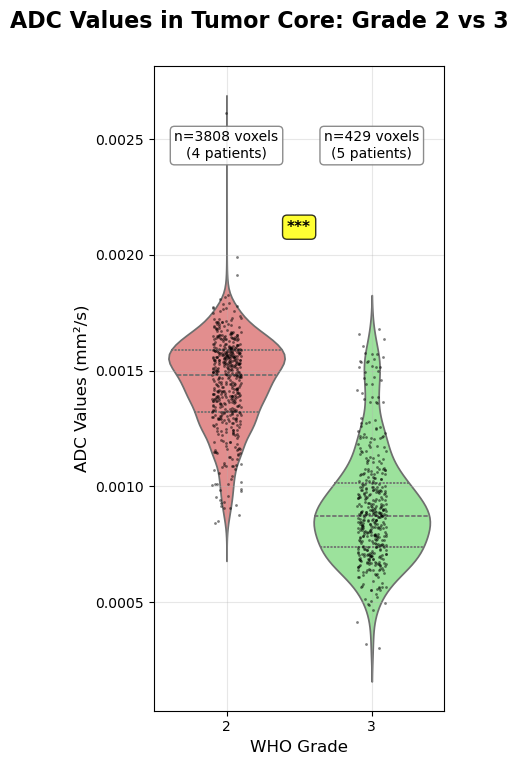


ADC values comparison (Grade 2 vs 3) completed!
Visualization shows ADC values from 4237 tumor core voxels
across 9 patients (4 Grade 2, 5 Grade 3)

Per-patient ADC Summary (Grade 2 vs 3):
                      count      mean       std       min       max
patient_id who_grade                                               
Patient01  3             47  0.000977  0.000133  0.000742  0.001248
Patient02  3             31  0.000791  0.000067  0.000673  0.000932
Patient05  3              2  0.001533  0.000021  0.001518  0.001548
Patient06  2             22  0.000878  0.000046  0.000756  0.000949
Patient09  2           2076  0.001417  0.000186  0.000880  0.002612
Patient16  3             24  0.001424  0.000212  0.000999  0.001680
Patient18  3            325  0.000866  0.000217  0.000304  0.001605
Patient19  2           1654  0.001512  0.000176  0.000817  0.001868
Patient21  2             56  0.000953  0.000058  0.000826  0.001087


In [ ]:
# ADC VALUES COMPARISON: WHO GRADE 2 vs 3
print("=" * 80)
print("ADC VALUES COMPARISON: WHO GRADE 2 vs 3")
print("=" * 80)

# Create single boxplot visualization for Grade 2 vs 3
fig_23, ax_23 = plt.subplots(1, 1, figsize=(4, 8))
fig_23.suptitle('ADC Values in Tumor Core: Grade 2 vs 3', 
                fontsize=16, fontweight='bold', y=0.95)

# Boxplot with individual points
sns.boxplot(data=df_adc_23, x='who_grade', y='adc_value', hue='who_grade', ax=ax_23, 
            palette=['lightcoral', 'lightgreen'], legend=False)

# Add jittered points (subsample for clarity if too many)
df_adc_sub_23 = df_adc_23.groupby('who_grade').apply(
    lambda x: x.sample(min(500, len(x)), random_state=42),
    include_groups=False
).reset_index()
if 'level_1' in df_adc_sub_23.columns:
    df_adc_sub_23 = df_adc_sub_23.drop(columns=['level_1'])

sns.stripplot(data=df_adc_sub_23, x='who_grade', y='adc_value', ax=ax_23, 
              size=2, alpha=0.5, color='black')

# Remove the overlapping subplot title
ax_23.set_xlabel('WHO Grade', fontsize=12)
ax_23.set_ylabel('ADC Values (mm²/s)', fontsize=12)
ax_23.grid(True, alpha=0.3)

# Add sample sizes positioned within the plot area
y_min_23, y_max_23 = ax_23.get_ylim()
y_range_23 = y_max_23 - y_min_23

# Get the unique grades and their corresponding positions
unique_grades_23 = sorted(df_adc_23['who_grade'].unique())
for i, grade in enumerate(unique_grades_23):
    grade_data_23 = df_adc_23[df_adc_23['who_grade'] == grade]
    if not grade_data_23.empty:
        n_patients_23 = grade_data_23['patient_id'].nunique()
        n_voxels_23 = len(grade_data_23)
        # Position the text box in the upper portion of the plot, but well within bounds
        y_pos_23 = y_max_23 - 0.1 * y_range_23  # 10% down from the top
        # Use the index i for x-position (0 for first grade, 1 for second grade, etc.)
        ax_23.text(i, y_pos_23, 
                   f'n={n_voxels_23} voxels\n({n_patients_23} patients)',
                   ha='center', va='top', fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'))

# Add statistical annotation positioned in the middle-upper area
if len(grade2_adc_23) > 0 and len(grade3_adc_23) > 0:
    _, p_value_plot_23 = stats.mannwhitneyu(grade2_adc_23, grade3_adc_23, alternative='two-sided')
    if p_value_plot_23 < 0.001:
        sig_text_23 = "***"
    elif p_value_plot_23 < 0.01:
        sig_text_23 = "**"
    elif p_value_plot_23 < 0.05:
        sig_text_23 = "*"
    else:
        sig_text_23 = "ns"
    
    # Position statistical annotation in the middle of the plot
    y_pos_stat_23 = y_max_23 - 0.25 * y_range_23  # 25% down from the top
    ax_23.text(0.5, y_pos_stat_23, f'{sig_text_23}', 
               ha='center', va='center',
               fontsize=11, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Leave space for the main title
plt.show()

print("\nADC values comparison (Grade 2 vs 3) completed!")
print(f"Visualization shows ADC values from {len(df_adc_23)} tumor core voxels")
print(f"across {df_adc_23['patient_id'].nunique()} patients ({grade_counts_23[2]} Grade 2, {grade_counts_23[3]} Grade 3)")

# Summary table by patient for Grade 2 vs 3
print("\nPer-patient ADC Summary (Grade 2 vs 3):")
patient_stats_23 = df_adc_23.groupby(['patient_id', 'who_grade'])['adc_value'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(6)
print(patient_stats_23)